# Project: Wrangling and Analyze Data of WeRateDogs

Author: Sarah Brown 09.12.2022

## Section 1: Data Gathering
In the cells below, I gather **all** three pieces of data for this project and load them into the notebook in 3 steps.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
import pandas as pd

In [5]:
# open and read twitter archive enhanced data

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

What is image predictions?

The tweet image predictions file 'image_predictions.tsv', is used to predict what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.

In [6]:
# open and read image predictions as csv

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
!pip install tweepy

Looking in indexes: https://artifactory.airbus.corp/artifactory/api/pypi/r-airbus-pypi-virtual/simple


In [7]:
import tweepy

In [8]:
import json

In [19]:
# read the data

df_list = []
# read the .txt file, line by line, and append the json data in each line to the list
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        print(line)
        json_data = json.loads(line)
        print(line)
        tweet_id = json_data['tweet_id']
        fvrt_count = json_data['favorite_count']
        rtwt_count = json_data['retweet_count']
        list_df.append({'tweet_id': tweet_id,
                        'favorite_count': fvrt_count,
                        'retweet_count': rtwt_count})

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

KeyError: 'tweet_id'

In [9]:
#load the json data and store it in a list
data = []
with open('tweet-json.txt') as f:    
        for line in f:         
             data.append(json.loads(line))
                
#create dataframe from json data
df_api = pd.DataFrame(data)

#select columns of interest
columns_of_interest = ['id', 'retweet_count', 'favorite_count']
df_api = df_api[columns_of_interest]

#source: https://knowledge.udacity.com/questions/30335

In [10]:
df_api.head(5)

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [11]:
df_api.to_csv('tweet_json.csv', index=False)

## Section 2: Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**, using **both** visual assessment programmatic assessement to assess the data.

**Guidance:** 

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### i: Detect

In this sub-section I am scouring the 3 pieces of data for quality issues or tidiness issues by using visual and programmatic asssessment

In [12]:
# open files in excel to see better 

twitter_archive.to_excel("twitter_archive.xlsx", sheet_name="twitter_archive", index=False)
image_predictions.to_excel("image_predictions.xlsx", sheet_name="image_predictions", index=False)
df_api.to_excel("tweets_json.xlsx", sheet_name="tweets_json", index=False)


# source: https://www.geeksforgeeks.org/convert-csv-to-excel-using-pandas-in-python/

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:931: UserWarning: Ignoring URL 'https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:931: UserWarning: Ignoring URL 'https://www.gofundme.com/help-fix-codys-torn-acl,https://twitter.com/dog_rates/status/870656317836468226/photo/1,https://twitter.com/dog_rates/status/870656317836468226/photo/1,https://twitter.com/dog_rates/status/870656317836468226/photo/1,https://twitter.com/dog_rates/status/870656317836468226/photo/1' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\ProgramData\Anac

#### Twitter_archive

In [13]:
twitter_archive.shape

(2356, 17)

In [14]:
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
# All of the incorrect dog names seem to start with a lower case letter - test that theory

result_ta= twitter_archive.loc[twitter_archive['name'].str.islower()==True]
result_ta.name.value_counts()

# source: https://stackoverflow.com/questions/70276727/how-to-check-all-values-in-a-column-are-lowercase
       # https://stackoverflow.com/questions/68679842/select-only-rows-with-true-pandas-dataframe

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
getting          2
actually         2
not              2
mad              2
incredibly       1
my               1
by               1
all              1
life             1
such             1
old              1
infuriating      1
his              1
this             1
space            1
unacceptable     1
light            1
officially       1
Name: name, dtype: int64

#### Tweets_json

In [20]:
tweets_json = pd.read_csv('tweet_json.csv')
tweets_json.head(5)

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [21]:
tweets_json.shape

(2354, 3)

In [22]:
tweets_json.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

In [23]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [24]:
tweets_json.nunique()

id                2354
retweet_count     1724
favorite_count    2007
dtype: int64

#### Image_predictions

In [25]:
image_predictions.shape

(2075, 12)

In [26]:
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [27]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

### ii: Document

In this sub-section I will describe the issues that I found in sub-section i, under headings for each data set

#### General

All 3 sheets link on tweet ID

'twitter_archive' and 'tweets_json' make more sense together, as they both contain stats about the tweet

#### Twitter_archive

Obsolete data: Retweets mixed up with normal tweets (we consider only tweets for this analysis) - 181 RT of 2356 Tweets

Some dog names from 'twitter_archive' are 'none'- That seems to be ok because the names are just not mentioned in the tweet

Source data: extraneous text aruond the source itself - not needed and makes it more complicated to read

Extraction errors: Some dog names from 'twitter_archive' are 'a', 'actually', 'an', 'all', 'by', 'getting', 'his'. 'just', 'my', 'not', 'old', 'one', 'quite', 'such', 'the', 'this', 'unacceptable', 'very'  - we have no way of knowing what these names are if it's not in the text, so should be changed to 'None'

in_reply_to_status_id and in_reply_to_user_id columns only have 78 entries

Missing data: Only 2297 entries have expanded URLs

Not all ratings are out of 10 - (23 rows)
a) unique feature of the site, but makes it harder to visualise 
b) some of the text's have more than one 'X/X' style entry: the one not referring to the rating has sometimes been recorded eg. This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 (1/2 has been recorded as rating instead of 9/10) - it seems that the one first mentioned is recorded 

Dog names are not all unique - could realistically happen

Data type incorrect: time stamps not in date:time format

Data type incorrect: The prediction number columns should have data type int

Data type incorrect: dog categories (puppo, floofer etc.) should be categorical data type (do this after combining four columns into one)

Not all dogs are categorised as: doggo, puppo, floofer etc. - not perceived to be a problem, but can't make data deductions on a category basis - this would be easier to digest in one column, no need for four

Many of the expanded URLs are duplicated and/or include non-twitter URLs 

#### Tweets_json

Missing data: 2 lines of data less than twitter_archive. 2 rows without a retweet and favourites count sorted out when you remove re-tweets

No missing data within the 2345 rows

Tidiness: We cannot tell the date of the tweet from this table alone, therefore we need to combine it with 'twitter_archive' to remove data past Aug 1st 2017

#### Image_predictions

Less 'image predictions' rows (2075) than 'twitter_archive' or 'tweets_json' (no data beyond Aug 1st 2017?) - To find out why you need to combine all the data sets to get the date stamp

Not all photos are predicted to be dogs: there is 'shopping cart', 'turtle', 'snail', 'seat-belt' etc.

Some dog names have _ as separators, some have - , and some have both

Missing data: 181 rows without images that are not RT's

NB: All rows have predictions after you remove retweets and no image rows

Not all dog breeds have capital letters

My general scanning of the datasets for issues resulted in the above observations. In this next sub-section I have arranged the issues into those I wish to address in the cleaning phase.

### iii: Issues to address

### Quality issues

Twitter_archive:

1. Some rows are re-tweets which are not considered in this analysis (181 rows with retweet status)

2. Data type incorrect: time stamps not in date:time format

3. Data type incorrect: dog categories (puppo, floofer etc.) should be categorical data type (do this after combining columns into one)

4. Source column: extraneous information around the source word itself, makes it hard to see and manipulate

5. Extraction errors: Some dog names from don't seem like real names but an incorrectly extracted part of the text eg. 'a', 'actually', 'an', 'all', 'by', 'getting', 'his' - these all start with lower case letters

6. Not all ratings are out of 10 - (23 rows) - unique feature of the site, but makes it harder to visualise 

a) some of the text's have more than one 'X/X' style entry: the one not referring to the rating has sometimes been recorded eg. This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 (1/2 has been recorded as rating instead of 9/10) - it seems that the one first mentioned is recorded 

b) the rating denominators above 10 which are not a mistake, could be turned into a ratio for better data visulisation

Tweets_json:

7. Missing data: 2 lines of data less than twitter_archive. 2 rows without a retweet and favourites count sorted out when you remove re-tweets

Image_predictions:

8. Missing data: Some rows don't have images, which won't be considered for this analysis (181 rows after removing retweets)

### Tidiness issues
1. We need all data to be in the same dataframe to understand other factors such as date of tweet- (name of tweet_id column not consistent across the 3 dataframes)


2. Dog category (doggo, puppo, floofer etc) could be one column

## Section 3: Cleaning Data
In this section, I clean **all** of the issues that I stated in the sub-section 'Issues to address'. 

In [29]:
# Make copies of original pieces of data 

twitter_archive_backup = twitter_archive.copy()
tweets_json_backup = tweets_json.copy()
image_predictions_backup = image_predictions.copy()

I will address the issues in this order (therefore not necessarily corresponding to the numerical order in sub-section 'Issues to address', please see the description of each issue 1-10):

1. Merge the 3 dataframes, to make sure than quality steps are applied to all rows
2. Missing data
3. Tidiness issues
4. Other quality issues

### Issue #1:

#### Define: We need all data to be in the same dataframe to understand other factors such as date of tweet- (name of tweet_id column not consistent across the 3 dataframes)

#### Action: Combine all 3 datasets on tweet_id (changing the column name in 'tweets_json'), using outer merge because we want to see all quality issues and where they originate and save as 'twitter_archive_master'

#### Code

In [30]:
tweets_json.rename(columns={'id':'tweet_id'}, inplace=True)

In [31]:
tweets_json.to_csv('tweet_json_v2.csv', index=False)

In [32]:
twitter_archive_master = pd.merge(pd.merge(twitter_archive,tweets_json,on='tweet_id', how='outer'),image_predictions,on='tweet_id', how='outer')
twitter_archive_master.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...  img_num  \
0  https://twitter.com/dog_rates/status/892420643...  ...      1.0   
1  https://twitter.com/dog_rates/status/892177421...  ...      1.0   
2  https://twitter.com/dog_rates/status/891815181...  ...      1.0   
3  https://twitter.com/dog_rates/status/891689557...  ...      1.0   
4  https://twitter.com/dog_rates/status/891327558...  ...      2.0   

            p1   p1_conf p1_dog                  p2   p2_conf p2_dog  \
0       orange  0.097049  False               bagel  0.085851  False   
1    Chihuahua  0.323581   True            Pekinese  0.090647   True   
2    Chihuahua  0.716012   True            malamute  0.078253   True   
3  paper_towel  0.170278  False  Labrador_retriever  0.168086   True   
4       basset  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  
0                       banana  0.076110  False  
1                     papillon  0.068957   True  
2                       kelpie  0.031379   True  
3                      spatula  0.040836  False  
4  German_short-haired_pointer  0.175219   True  

[5 rows x 30 columns]

#### Test 

In [33]:
twitter_archive_master.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...  img_num  \
0  https://twitter.com/dog_rates/status/892420643...  ...      1.0   
1  https://twitter.com/dog_rates/status/892177421...  ...      1.0   
2  https://twitter.com/dog_rates/status/891815181...  ...      1.0   
3  https://twitter.com/dog_rates/status/891689557...  ...      1.0   
4  https://twitter.com/dog_rates/status/891327558...  ...      2.0   

            p1   p1_conf p1_dog                  p2   p2_conf p2_dog  \
0       orange  0.097049  False               bagel  0.085851  False   
1    Chihuahua  0.323581   True            Pekinese  0.090647   True   
2    Chihuahua  0.716012   True            malamute  0.078253   True   
3  paper_towel  0.170278  False  Labrador_retriever  0.168086   True   
4       basset  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  
0                       banana  0.076110  False  
1                     papillon  0.068957   True  
2                       kelpie  0.031379   True  
3                      spatula  0.040836  False  
4  German_short-haired_pointer  0.175219   True  

[5 rows x 30 columns]

In [34]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [69]:
# send to excel for further examination

twitter_archive_master.to_excel("twitter_archive_master.xlsx", sheet_name="twitter_archive_master", index=False)

In [35]:
twitter_archive_master.shape

(2356, 30)

### Issue #2:

#### Define: Some rows are re-tweets which are not considered in this analysis (181 rows with retweet status)

#### Action: Remove any rows with data in the column 'retweeted_status_id' and then delete the columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

#### Code

In [71]:
# make backup of master dataframe 

twitter_archive_master_backup = twitter_archive_master.copy()

In [4]:
import pandas as pd
import numpy as np
twitter_archive_master = pd.read_csv('twitter_archive_master_backup.csv')

In [5]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.retweeted_status_id > 0].index, inplace=True)

# source: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

#### Test

In [6]:
#should be 2356 - 181 rows = 2175

twitter_archive_master.shape

(2175, 30)

In [7]:
#should show 0 in the 3 retweet columns

twitter_archive_master.nunique()

tweet_id                      2175
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2175
source                           4
text                          2175
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2116
rating_numerator                40
rating_denominator              18
name                           956
doggo                            2
floofer                          2
pupper                           2
puppo                            2
retweet_count                 1713
favorite_count                2006
jpg_url                       1994
img_num                          4
p1                             374
p1_conf                       1991
p1_dog                           2
p2                             401
p2_conf                       1989
p2_dog                           2
p3                             405
p3_conf             

#### Code (2)

In [8]:
twitter_archive_master = twitter_archive_master.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#accidently re-run whilst tidying up the report. Ignore the error.

#### Test (2)

In [9]:
#should be 30 - 3 rows = 27 

twitter_archive_master.shape

(2175, 27)

In [10]:
twitter_archive_master.nunique()

tweet_id                 2175
in_reply_to_status_id      77
in_reply_to_user_id        31
timestamp                2175
source                      4
text                     2175
expanded_urls            2116
rating_numerator           40
rating_denominator         18
name                      956
doggo                       2
floofer                     2
pupper                      2
puppo                       2
retweet_count            1713
favorite_count           2006
jpg_url                  1994
img_num                     4
p1                        374
p1_conf                  1991
p1_dog                      2
p2                        401
p2_conf                  1989
p2_dog                      2
p3                        405
p3_conf                  1991
p3_dog                      2
dtype: int64

### Issue #3:

#### Define: Missing data: Some rows don't have images, which won't be considered for this analysis (181 rows after removing retweets)

#### Action: Remove any rows without data in the column 'jpg_url' 

#### Code

In [11]:
import numpy as np

In [12]:
# replace empty strings with NaN

twitter_archive_master['jpg_url'].replace('', np.nan, inplace=True)

In [13]:
# drop NaNs

twitter_archive_master.dropna(subset=['jpg_url'], inplace=True)

#source: https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-a-pandas-dataframe

#### Test

In [14]:
# there should be 1994 rows

twitter_archive_master.shape

(1994, 27)

In [15]:
twitter_archive_master.nunique()

tweet_id                 1994
in_reply_to_status_id      22
in_reply_to_user_id         1
timestamp                1994
source                      3
text                     1994
expanded_urls            1994
rating_numerator           34
rating_denominator         15
name                      936
doggo                       2
floofer                     2
pupper                      2
puppo                       2
retweet_count            1595
favorite_count           1850
jpg_url                  1994
img_num                     4
p1                        374
p1_conf                  1991
p1_dog                      2
p2                        401
p2_conf                  1989
p2_dog                      2
p3                        405
p3_conf                  1991
p3_dog                      2
dtype: int64

### Issue #4:

#### Define: Missing data: 2 lines of data less than twitter_archive. 2 rows without a retweet and favourites count sorted out when you remove re-tweets

#### Action: Issue should already be solved by the actions in issue 2 and 3

#### Test

In [16]:
twitter_archive_master[twitter_archive_master['retweet_count'].isnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, retweet_count, favorite_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 27 columns]

In [17]:
twitter_archive_master[twitter_archive_master['favorite_count'].isnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, retweet_count, favorite_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 27 columns]

### Issue #5:

#### Define: Time stamps are in object not date:time types

#### Action: Convert column 'timestamp' to date:time data type

#### Code

In [18]:
twitter_archive_master.timestamp =  pd.to_datetime(twitter_archive_master.timestamp)

#### Test

In [19]:
twitter_archive_master.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                datetime64[ns, UTC]
source                                object
text                                  object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
retweet_count                        float64
favorite_count                       float64
jpg_url                               object
img_num                              float64
p1                                    object
p1_conf                              float64
p1_dog                                object
p2                                    object
p2_conf   

In [20]:
twitter_archive_master.to_csv('twitter_archive_master_i5.csv', index=False)

### Issue #6:

#### Define: Dog categories should be in one column instead of 4 (and 'none' should really be NaN)

#### Action: Merge the 4 columns to create one

#### Code

In [21]:
# Extract the categories from the 4 columns

twitter_archive_master['dog_category'] = twitter_archive_master['text'].str.extract('(doggo|floofer|puppo|pupper)')

In [22]:
# Drop the four original columns

twitter_archive_master = twitter_archive_master.drop(columns=['doggo', 'floofer', 'puppo', 'pupper'])

#### Test

In [23]:
twitter_archive_master.nunique()

tweet_id                 1994
in_reply_to_status_id      22
in_reply_to_user_id         1
timestamp                1994
source                      3
text                     1994
expanded_urls            1994
rating_numerator           34
rating_denominator         15
name                      936
retweet_count            1595
favorite_count           1850
jpg_url                  1994
img_num                     4
p1                        374
p1_conf                  1991
p1_dog                      2
p2                        401
p2_conf                  1989
p2_dog                      2
p3                        405
p3_conf                  1991
p3_dog                      2
dog_category                4
dtype: int64

In [56]:
twitter_archive_master.to_csv('twitter_archive_master_i6.csv', index=False)

### Issue #7:

#### Define: Incorrect data type: Dog category should be categorical data type

#### Action: Change data type of column 'dog category' to categorial 

#### Code

In [24]:
twitter_archive_master['dog_category'] = twitter_archive_master['dog_category'].astype('category')

#### Test

In [25]:
twitter_archive_master.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                datetime64[ns, UTC]
source                                object
text                                  object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
retweet_count                        float64
favorite_count                       float64
jpg_url                               object
img_num                              float64
p1                                    object
p1_conf                              float64
p1_dog                                object
p2                                    object
p2_conf                              float64
p2_dog                                object
p3                                    object
p3_conf                              float64
p3_dog    

In [59]:
twitter_archive_master.to_csv('twitter_archive_master_i7.csv', index=False)

### Issue #8:

#### Define: Source column has extraneous information around the source itself that makes it hard to read and manipulate

#### Action: Remove web address letters and leave only the source itself

#### Code

In [26]:
twitter_archive_master.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)
twitter_archive_master.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter', inplace=True)
twitter_archive_master.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)

# NB: Source 'Vine' were all deleted in issue 3

#### Test

In [27]:
twitter_archive_master.source.value_counts()

iPhone       1955
Twitter        28
Tweetdeck      11
Name: source, dtype: int64

In [28]:
twitter_archive_master.to_csv('twitter_archive_master_i8.csv', index=False)

### Issue #9:

#### Define: Extraction errors: Some dog names don't seem like real names but an incorrectly extracted part of the text eg. 'a', 'actually', 'an', 'all', 'by', 'getting', 'his' - these all start with lower case letters

#### Action: Replace any row with an entry starting with a lower case letter in column 'name' with 'None'

#### Code

In [1]:
import pandas as pd
import numpy as np

In [3]:
twitter_archive_master = pd.read_csv('twitter_archive_master_i8.csv')

In [29]:
result_ta= twitter_archive_master.loc[twitter_archive_master['name'].str.islower()==True]
result_ta.name.value_counts()

a               55
the              7
an               6
one              4
very             4
quite            3
just             3
getting          2
by               1
actually         1
not              1
unacceptable     1
officially       1
this             1
such             1
incredibly       1
all              1
space            1
his              1
infuriating      1
my               1
light            1
Name: name, dtype: int64

In [30]:
twitter_archive_master.replace(to_replace= ['a', 'the', 'an', 'one', 'very', 'just', 'quite', 'getting', 'by', 'incredibly', 'such', 'officially', 'all', 'actually', 'light', 'this', 'not', 'infuriating', 'my', 'space', 'unacceptable', 'his'], value = 'None', inplace=True)              

#### Test

In [31]:
result_test= twitter_archive_master.loc[twitter_archive_master['name'].str.islower()==True]
result_test.name.value_counts()

Series([], Name: name, dtype: int64)

In [32]:
twitter_archive_master.nunique()

tweet_id                 1994
in_reply_to_status_id      22
in_reply_to_user_id         1
timestamp                1994
source                      3
text                     1994
expanded_urls            1994
rating_numerator           34
rating_denominator         15
name                      914
retweet_count            1595
favorite_count           1850
jpg_url                  1994
img_num                     4
p1                        374
p1_conf                  1991
p1_dog                      2
p2                        401
p2_conf                  1989
p2_dog                      2
p3                        405
p3_conf                  1991
p3_dog                      2
dog_category                4
dtype: int64

In [9]:
twitter_archive_master.to_csv('twitter_archive_master_i9.csv', index=False)

### Issue #10:

#### Define: Not all dog ratings are out of 10 - (23 rows) - unique feature of the site, but makes it harder to visualise 

a) some of the text's have more than one 'X/X' style entry: the one not referring to the rating has sometimes been recorded eg. This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 (1/2 has been recorded as rating instead of 9/10) - it seems that the one first mentioned is recorded 

b) the rating denominators above 10 which are not a mistake, could be turned into a ratio for better data visulisation

#### Action: a) 

#### Code

In [33]:
twitter_archive_master.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [34]:
rating_denominator_not10 = twitter_archive_master.query('rating_denominator != 10')[['text','rating_numerator', 'rating_denominator']]
rating_denominator_not10

text  rating_numerator  \
433   The floofs have been released I repeat the flo...                84   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...                24   
902   Why does this never happen at my front door......               165   
1068  After so many requests, this is Bretagne. She ...                 9   
1120  Say hello to this unbelievably well behaved sq...               204   
1165  Happy 4/20 from the squad! 13/10 for all https...                 4   
1202  This is Bluebert. He just saw that both #Final...                50   
1228  Happy Saturday here's 9 puppers on a bench. 99...                99   
1254  Here's a brigade of puppers. All look very pre...                80   
1274  From left to right:\nCletus, Jerome, Alejandro...                45   
1351  Here is a whole flock of puppers.  60/50 I'll ...                60   
1433  Happy Wednesday here's a bucket of pups. 44/40...                44   
1634  Two sneaky puppers were not initially seen, mo...               143   
1635  Someone help the girl is being mugged. Several...               121   
1662  This is Darrel. He just robbed a 7/11 and is i...                 7   
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think...               144   
1843  Here we have an entire platoon of puppers. Tot...                88   
2335  This is an Albanian 3 1/2 legged  Episcopalian...                 1   

      rating_denominator  
433                   70  
516                    7  
902                  150  
1068                  11  
1120                 170  
1165                  20  
1202                  50  
1228                  90  
1254                  80  
1274                  50  
1351                  50  
1433                  40  
1634                 130  
1635                 110  
1662                  11  
1779                 120  
1843                  80  
2335                   2

Entries falling into issue A: 800, 891, 925, 1328, 1973

Entries falling into issue B: 323, 662, 848, 946, 970, 988, 1054, 1130, 1302, 1303, 1435, 1494

Exception: 385 - to be deleted as there is no real rating

In [36]:
# For entries with issue A, use iloc function to replace each rating with correct one

twitter_archive_master.iloc[800, 7:9] = ['14', '10']
twitter_archive_master.iloc[891, 7:9] = ['13', '10']
twitter_archive_master.iloc[925, 7:9] = ['11', '10']
twitter_archive_master.iloc[1328, 7:9] = ['10', '10']
twitter_archive_master.iloc[1973, 7:9] = ['9', '10']

# source: https://stackoverflow.com/questions/72339690/how-to-replace-values-of-an-individual-row-and-specific-columns-in-pandas-data-f

In [37]:
twitter_archive_master.to_csv('twitter_archive_master_i10a.csv', index=False)

In [53]:
twitter_archive_master = pd.read_csv('twitter_archive_master_i10a.csv')

#### Action: b) 

In [54]:
# For entries with issue B, use iloc function to replace each rating with the ratio version

twitter_archive_master.iloc[323, 7:9] = ['12', '10'] #both rows divided by 7
twitter_archive_master.iloc[662, 7:9] = ['11', '10'] #both rows divided by 15
twitter_archive_master.iloc[848, 7:9] = ['12', '10'] #both rows divided by 17
twitter_archive_master.iloc[946, 7:9] = ['11', '10'] #both rows divided by 9
twitter_archive_master.iloc[970, 7:9] = ['10', '10'] #both rows divided by 8
twitter_archive_master.iloc[988, 7:9] = ['9', '10'] #both rows divided by 5
twitter_archive_master.iloc[1054, 7:9] = ['12', '10'] #both rows divided by 5
twitter_archive_master.iloc[1130, 7:9] = ['11', '10'] #both rows divided by 4
twitter_archive_master.iloc[1302, 7:9] = ['11', '10'] #both rows divided by 13
twitter_archive_master.iloc[1303, 7:9] = ['11', '10'] #both rows divided by 11
twitter_archive_master.iloc[1435, 7:9] = ['12', '10'] #both rows divided by 12
twitter_archive_master.iloc[1494, 7:9] = ['11', '10'] #both rows divided by 8

#### Test (a)

In [55]:
row = twitter_archive_master.iloc[800, 7:9]
print(row)

rating_numerator      14
rating_denominator    10
Name: 800, dtype: object


In [56]:
row = twitter_archive_master.iloc[891, 7:9]
print(row)

rating_numerator      13
rating_denominator    10
Name: 891, dtype: object


In [57]:
row = twitter_archive_master.iloc[925, 7:9]
print(row)

rating_numerator      11
rating_denominator    10
Name: 925, dtype: object


In [58]:
row = twitter_archive_master.iloc[1328, 7:9]
print(row)

rating_numerator      10
rating_denominator    10
Name: 1328, dtype: object


In [59]:
row = twitter_archive_master.iloc[1973, 7:9]
print(row)

rating_numerator       9
rating_denominator    10
Name: 1973, dtype: object


In [60]:
row = twitter_archive_master.iloc[323, 7:9]
print(row)

rating_numerator      12
rating_denominator    10
Name: 323, dtype: object


In [45]:
row = twitter_archive_master.iloc[1494, 7:9]
print(row)

rating_numerator      11
rating_denominator    10
Name: 1843, dtype: object


#### Test (b)

In [61]:
twitter_archive_master.rating_denominator.value_counts()

# 7 is the line 385, which is to be deleted in the next step

10    1981
10      12
7        1
Name: rating_denominator, dtype: int64

In [62]:
find7 = twitter_archive_master.copy()

In [63]:
find7[find7['rating_denominator'] == 7]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
385  810984652412424192                    NaN                  NaN   

                     timestamp  source  \
385  2016-12-19 23:06:23+00:00  iPhone   

                                                  text  \
385  Meet Sam. She smiles 24/7 &amp; secretly aspir...   

                                         expanded_urls rating_numerator  \
385  https://www.gofundme.com/sams-smile,https://tw...               24   

    rating_denominator name  ...                p1   p1_conf p1_dog  \
385                  7  Sam  ...  golden_retriever  0.871342   True   

                  p2   p2_conf  p2_dog                  p3   p3_conf  p3_dog  \
385  Tibetan_mastiff  0.036708    True  Labrador_retriever  0.025823    True   

     dog_category  
385           NaN  

[1 rows x 24 columns]

In [64]:
twitter_archive_master.drop([385], inplace = True)

In [65]:
twitter_archive_master.rating_denominator.value_counts()

10    1981
10      12
Name: rating_denominator, dtype: int64

In [66]:
twitter_archive_master['rating_denominator'] = pd.to_numeric(twitter_archive_master['rating_denominator'], errors='coerce')

#Source: https://stackoverflow.com/questions/67427693/pandas-dataframe-value-counts-count-same-values-seperately-as-unique-values

In [67]:
twitter_archive_master['rating_numerator'] = pd.to_numeric(twitter_archive_master['rating_numerator'], errors='coerce')

In [68]:
twitter_archive_master.rating_denominator.value_counts()

10    1993
Name: rating_denominator, dtype: int64

In [69]:
#last status backup 

twitter_archive_master.to_csv('twitter_archive_master_i10b.csv', index=False)

#### Last cleaning and testing actions

In [70]:
#index needs to be reset

twitter_archive_master.reset_index(drop=True)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
1988  666049248165822465                    NaN                  NaN   
1989  666044226329800704                    NaN                  NaN   
1990  666033412701032449                    NaN                  NaN   
1991  666029285002620928                    NaN                  NaN   
1992  666020888022790149                    NaN                  NaN   

                      timestamp  source  \
0     2017-08-01 16:23:56+00:00  iPhone   
1     2017-08-01 00:17:27+00:00  iPhone   
2     2017-07-31 00:18:03+00:00  iPhone   
3     2017-07-30 15:58:51+00:00  iPhone   
4     2017-07-29 16:00:24+00:00  iPhone   
...                         ...     ...   
1988  2015-11-16 00:24:50+00:00  iPhone   
1989  2015-11-16 00:04:52+00:00  iPhone   
1990  2015-11-15 23:21:54+00:00  iPhone   
1991  2015-11-15 23:05:30+00:00  iPhone   
1992  2015-11-15 22:32:08+00:00  iPhone   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
1988  Here we have a 1949 1st generation vulpix. Enj...   
1989  This is a purebred Piers Morgan. Loves to Netf...   
1990  Here is a very happy pup. Big fan of well-main...   
1991  This is a western brown Mitsubishi terrier. Up...   
1992  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
1988  https://twitter.com/dog_rates/status/666049248...                 5   
1989  https://twitter.com/dog_rates/status/666044226...                 6   
1990  https://twitter.com/dog_rates/status/666033412...                 9   
1991  https://twitter.com/dog_rates/status/666029285...                 7   
1992  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name  ...                      p1   p1_conf  \
0                     10   Phineas  ...                  orange  0.097049   
1                     10     Tilly  ...               Chihuahua  0.323581   
2                     10    Archie  ...               Chihuahua  0.716012   
3                     10     Darla  ...             paper_towel  0.170278   
4                     10  Franklin  ...                  basset  0.555712   
...                  ...       ...  ...                     ...       ...   
1988                  10      None  ...      miniature_pinscher  0.560311   
1989                  10      None  ...     Rhodesian_ridgeback  0.408143   
1990                  10      None  ...         German_shepherd  0.596461   
1991                  10      None  ...                 redbone  0.506826   
1992                  10      None  ...  Welsh_springer_spaniel  0.465074   

     p1_dog                  p2   p2_conf  p2_dog  \
0     False           

In [71]:
twitter_archive_master.dtypes

tweet_id                   int64
in_reply_to_status_id    float64
in_reply_to_user_id      float64
timestamp                 object
source                    object
text                      object
expanded_urls             object
rating_numerator           int64
rating_denominator         int64
name                      object
retweet_count            float64
favorite_count           float64
jpg_url                   object
img_num                  float64
p1                        object
p1_conf                  float64
p1_dog                      bool
p2                        object
p2_conf                  float64
p2_dog                      bool
p3                        object
p3_conf                  float64
p3_dog                      bool
dog_category              object
dtype: object

In [72]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
retweet_count            1993 non-null float64
favorite_count           1993 non-null float64
jpg_url                  1993 non-null object
img_num                  1993 non-null float64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993 non-null float64
p2_dog               

In [73]:
twitter_archive_master.nunique()

tweet_id                 1993
in_reply_to_status_id      22
in_reply_to_user_id         1
timestamp                1993
source                      3
text                     1993
expanded_urls            1993
rating_numerator           20
rating_denominator          1
name                      914
retweet_count            1594
favorite_count           1850
jpg_url                  1993
img_num                     4
p1                        374
p1_conf                  1990
p1_dog                      2
p2                        401
p2_conf                  1988
p2_dog                      2
p3                        405
p3_conf                  1990
p3_dog                      2
dog_category                4
dtype: int64

This concludes the cleaning section. I have correct the 10 issues (including quality(8) and tidiness(2)) that I set out to do in this section. As per the guidance, I have not corrected all of the issues that I could observe with the dataset, but chosen 10 with which to prove my abilities in data wrangling.

## Section 4: Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master_done.csv".

In [74]:
twitter_archive_master.to_csv('twitter_archive_master_done_V2.csv', index=False)

## Section 5: Analyzing and Visualizing Data
In this section, I will analyze and visualize my newly cleaned and tidied data.

I will ask 4 questions of the data, which stand out to me as the first thing I would like to know and display the outcomes it in graphical form.

In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [76]:
df = pd.read_csv('twitter_archive_master_done_V2.csv')

### Insights:
1. Which dog category gets the most favourites?

2. Which dog category gets the most retweets?

3. Are favourite count and retweet count correlated?

4. Does a high rating correlate with high favourites?


#### 1. Which dog category gets the most favourites?

In [77]:
df_category = df[df["dog_category"].isnull()==False]

categories = df_category.query('dog_category=="floofer" or dog_category=="doggo" or dog_category=="puppo" or dog_category=="pupper"')

favorite_counts_categories = pd.DataFrame(categories.groupby('dog_category').favorite_count.mean().sort_values())

favorite_counts_categories['categories'] = favorite_counts_categories.index

favorite_counts_categories.plot(x="categories",y='favorite_count',kind='bar',title="Average favorite counts by dog category",color='b', alpha=0.6)

The results show that the dog categories puppo and floofer receive the most favourites when tweeted. This seems to make sense, in the way that puppos (puppies in internet slang) are typically seen as cuter than older dogs and fluffy (floofers means fluffy dogs) is synonymous with 'cute' things in popular culture.

It would make sense to do this analysis with dog breeds as well, since breed is a more accurate categorisation.

#### 2. Which dog category gets the most retweets?

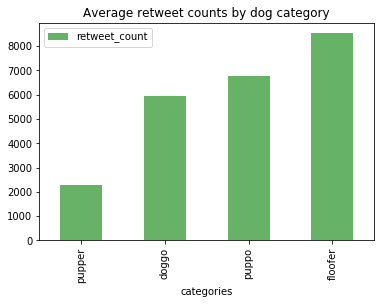

In [78]:
df_category = df[df["dog_category"].isnull()==False]

categories = df_category.query('dog_category=="floofer" or dog_category=="doggo" or dog_category=="puppo" or dog_category=="pupper"')

retweet_counts_categories = pd.DataFrame(categories.groupby('dog_category').retweet_count.mean().sort_values())

retweet_counts_categories['categories'] = retweet_counts_categories.index

retweet_counts_categories.plot(x="categories",y='retweet_count',kind='bar',title="Average retweet counts by dog category",color='g', alpha=0.6)

The result of which dog category receives the most retweets when tweeted about is also floofers, followed by puppos; a similar outcome to favourites, which makes sense because both are ways of showing 'approval' on the Twitter platform.

As stated above, I would do the same analysis on dog breeds.

#### 3.  Are favourite count and retweet count correlated?

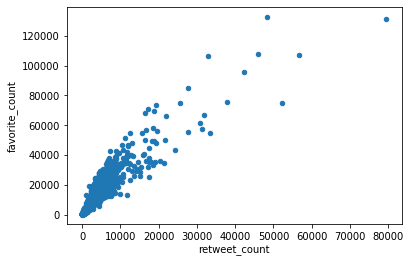

In [79]:
df.plot(x = 'retweet_count', y = 'favorite_count', kind= 'scatter');

In [80]:
correlation = df.corr()
print(correlation.loc['retweet_count', 'favorite_count'])

0.9129441073256541


Although we could logically assume before that favourite and retweet count would be strongly correlated as they are both ways to show 'approval' on Twitter, I wanted to be sure. 

We can see a strong correlation in the graph, but I followed it up with a check on the numerical correlation which is 0.91 = very strong.

#### 4. Does a high rating correlate with high favourites?

In [81]:
df.plot(x = 'rating_numerator', y = 'favorite_count', kind= 'scatter');

In [82]:
correlation = df.corr()
print(correlation.loc['rating_numerator', 'favorite_count'])

0.015993710562848013


The graph looks distorted and the shape doesn't tell us anything because there are a few outlying ratings such as 1776 and 420. 

In [83]:
df.rating_numerator.value_counts()

12      454
10      421
11      403
13      262
9       152
8        95
7        51
14       36
5        33
6        32
3        19
4        15
2         9
1         4
0         2
420       1
26        1
27        1
75        1
1776      1
Name: rating_numerator, dtype: int64

In [84]:
find1776 = df.copy()

In [85]:
find1776[find1776['rating_numerator'] == 1776]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
725  749981277374128128                    NaN                  NaN   

                     timestamp     source  \
725  2016-07-04 15:00:45+00:00  Tweetdeck   

                                                  text  \
725  This is Atticus. He's quite simply America af....   

                                         expanded_urls  rating_numerator  \
725  https://twitter.com/dog_rates/status/749981277...              1776   

     rating_denominator     name  ...       p1   p1_conf p1_dog          p2  \
725                  10  Atticus  ...  bow_tie  0.533941  False  sunglasses   

      p2_conf  p2_dog        p3   p3_conf  p3_dog  dog_category  
725  0.080822   False  sunglass  0.050776   False           NaN  

[1 rows x 24 columns]

In [86]:
find420 = df.copy()
find420[find420['rating_numerator'] == 420]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1717  670842764863651840                    NaN                  NaN   

                      timestamp  source  \
1717  2015-11-29 05:52:33+00:00  iPhone   

                                                   text  \
1717  After so many requests... here you go.\n\nGood...   

                                          expanded_urls  rating_numerator  \
1717  https://twitter.com/dog_rates/status/670842764...               420   

      rating_denominator  name  ...          p1   p1_conf p1_dog         p2  \
1717                  10  None  ...  microphone  0.096063  False  accordion   

       p2_conf  p2_dog         p3   p3_conf  p3_dog  dog_category  
1717  0.094075   False  drumstick  0.061113   False           NaN  

[1 rows x 24 columns]

In [87]:
#drop index 725 and 1717 for more appropriate scale 

df1 = df.drop([725], inplace = True)

In [88]:
df1 = df.drop([1717], inplace = True)

In [89]:
df.rating_numerator.value_counts()

12    454
10    421
11    403
13    262
9     152
8      95
7      51
14     36
5      33
6      32
3      19
4      15
2       9
1       4
0       2
27      1
26      1
75      1
Name: rating_numerator, dtype: int64

In [90]:
df.plot(x = 'rating_numerator', y = 'favorite_count', kind= 'scatter');

In [91]:
correlation = df.corr()
print(correlation.loc['rating_numerator', 'favorite_count'])

0.3410486883546102


The graph still doesn't look great, so let's drop all ratings above 14, just for illustrative purposes

In [92]:
findmany = df.copy()
findmany[findmany['rating_numerator'] > 14]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
502   786709082849828864                    NaN                  NaN   
552   778027034220126208                    NaN                  NaN   
1373  680494726643068929                    NaN                  NaN   

                      timestamp  source  \
502   2016-10-13 23:23:56+00:00  iPhone   
552   2016-09-20 00:24:34+00:00  iPhone   
1373  2015-12-25 21:06:00+00:00  iPhone   

                                                   text  \
502   This is Logan, the Chow who lived. He solemnly...   
552   This is Sophie. She's a Jubilant Bush Pupper. ...   
1373  Here we have uncovered an entire battalion of ...   

                                          expanded_urls  rating_numerator  \
502   https://twitter.com/dog_rates/status/786709082...                75   
552   https://twitter.com/dog_rates/status/778027034...                27   
1373  https://twitter.com/dog_rates/status/680494726...                26   

      rating_denominator    name  ...          p1   p1_conf p1_dog  \
502                   10   Logan  ...  Pomeranian  0.467321   True   
552                   10  Sophie  ...     clumber  0.946718   True   
1373                  10    None  ...      kuvasz  0.438627   True   

                  p2   p2_conf  p2_dog              p3   p3_conf  p3_dog  \
502      Persian_cat  0.122978   False            chow  0.102654    True   
552   cocker_spaniel  0.015950    True           Lhasa  0.006519    True   
1373         Samoyed  0.111622    True  Great_Pyrenees  0.064061    True   

      dog_category  
502            NaN  
552            NaN  
1373        pupper  

[3 rows x 24 columns]

In [93]:
df1 = df.drop([502], inplace = True)
df1 = df.drop([552], inplace = True)
df1 = df.drop([1373], inplace = True)

In [94]:
df.rating_numerator.value_counts()

12    454
10    421
11    403
13    262
9     152
8      95
7      51
14     36
5      33
6      32
3      19
4      15
2       9
1       4
0       2
Name: rating_numerator, dtype: int64

In [95]:
df.to_csv('twitter_archive_master_done_minushighratings_V2.csv', index=False)

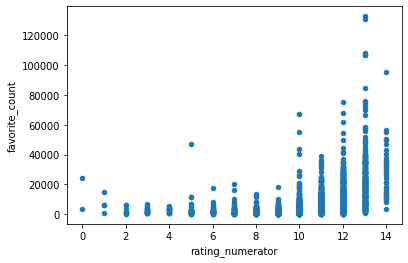

In [96]:
df.plot(x = 'rating_numerator', y = 'favorite_count', kind= 'scatter');

In [97]:
correlation = df.corr()
print(correlation.loc['rating_numerator', 'favorite_count'])

0.40556517648890444


Finally, as retweets and favourites are both Twitter mechanisms of showing 'approval', I wanted to see if the Twitter audience were largely in agreement with the account owner when rating dogs, ie. do the dogs with higher fractional ratings receive larger numbers of favourites/retweets. 

I had to eliminate 5 data points which were outliers in order to get a better visulisation of this data. What we see when looking at all ratings 14/10 or lower is that the correlation seems to suggest some level of correlation. When followed up with a numerical correlation calculation, the result is 0.4, which suggest a rather moderate correlation. We can see that there are more instances of higher dog ratings with a spread retweet/favourite count, which would suggest that the account owners rating and the audiences response (referring to favourite and retweets) is not always related.

This could be for several reasons. We would need to know how long each tweet has been live as it may have had more time to gain reactions, perhaps accounts with high numbers of followers retweeted some dogs and not others, which lead to a follow on effect on reactions, perhaps each tweet was done at a different time of day with a different user pattern. These are other ways that we could dig into this anaylsis, but as the tasks explains, it could take a very long time to exhaustively analyse this data set.